# Visualisation of Training and Testing data

In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
def plot_training_results(ax, rewards, accum_avg=False, mean=False):
    #plot rewards
    ax.plot(rewards, label='Rewards')

    #accumulated average
    if accum_avg:
        #accumulated = np.cumsum(rewards) / (np.arange(len(rewards)) + 1)
        accumulated = np.convolve(rewards, np.ones(100)/100, mode='valid')
        x = np.arange(100, len(rewards)+1)
        ax.plot(x, accumulated, 'r', label='Accumulated Reward')
    
    if mean:
        mean = np.mean(rewards)
        ax.axhline(mean, color='g', linestyle='--', label='Mean Reward')

    #labels, ticks, legend and grid
    ax.set_xlabel('Episodes', fontsize = 20)
    ax.set_ylabel('Rewards', fontsize = 20)
    ax.legend()
    ax.grid(True)
    ax.legend(fontsize=14, loc='lower right')
    ax.tick_params(labelsize=16)

# TRAINING PLOTS

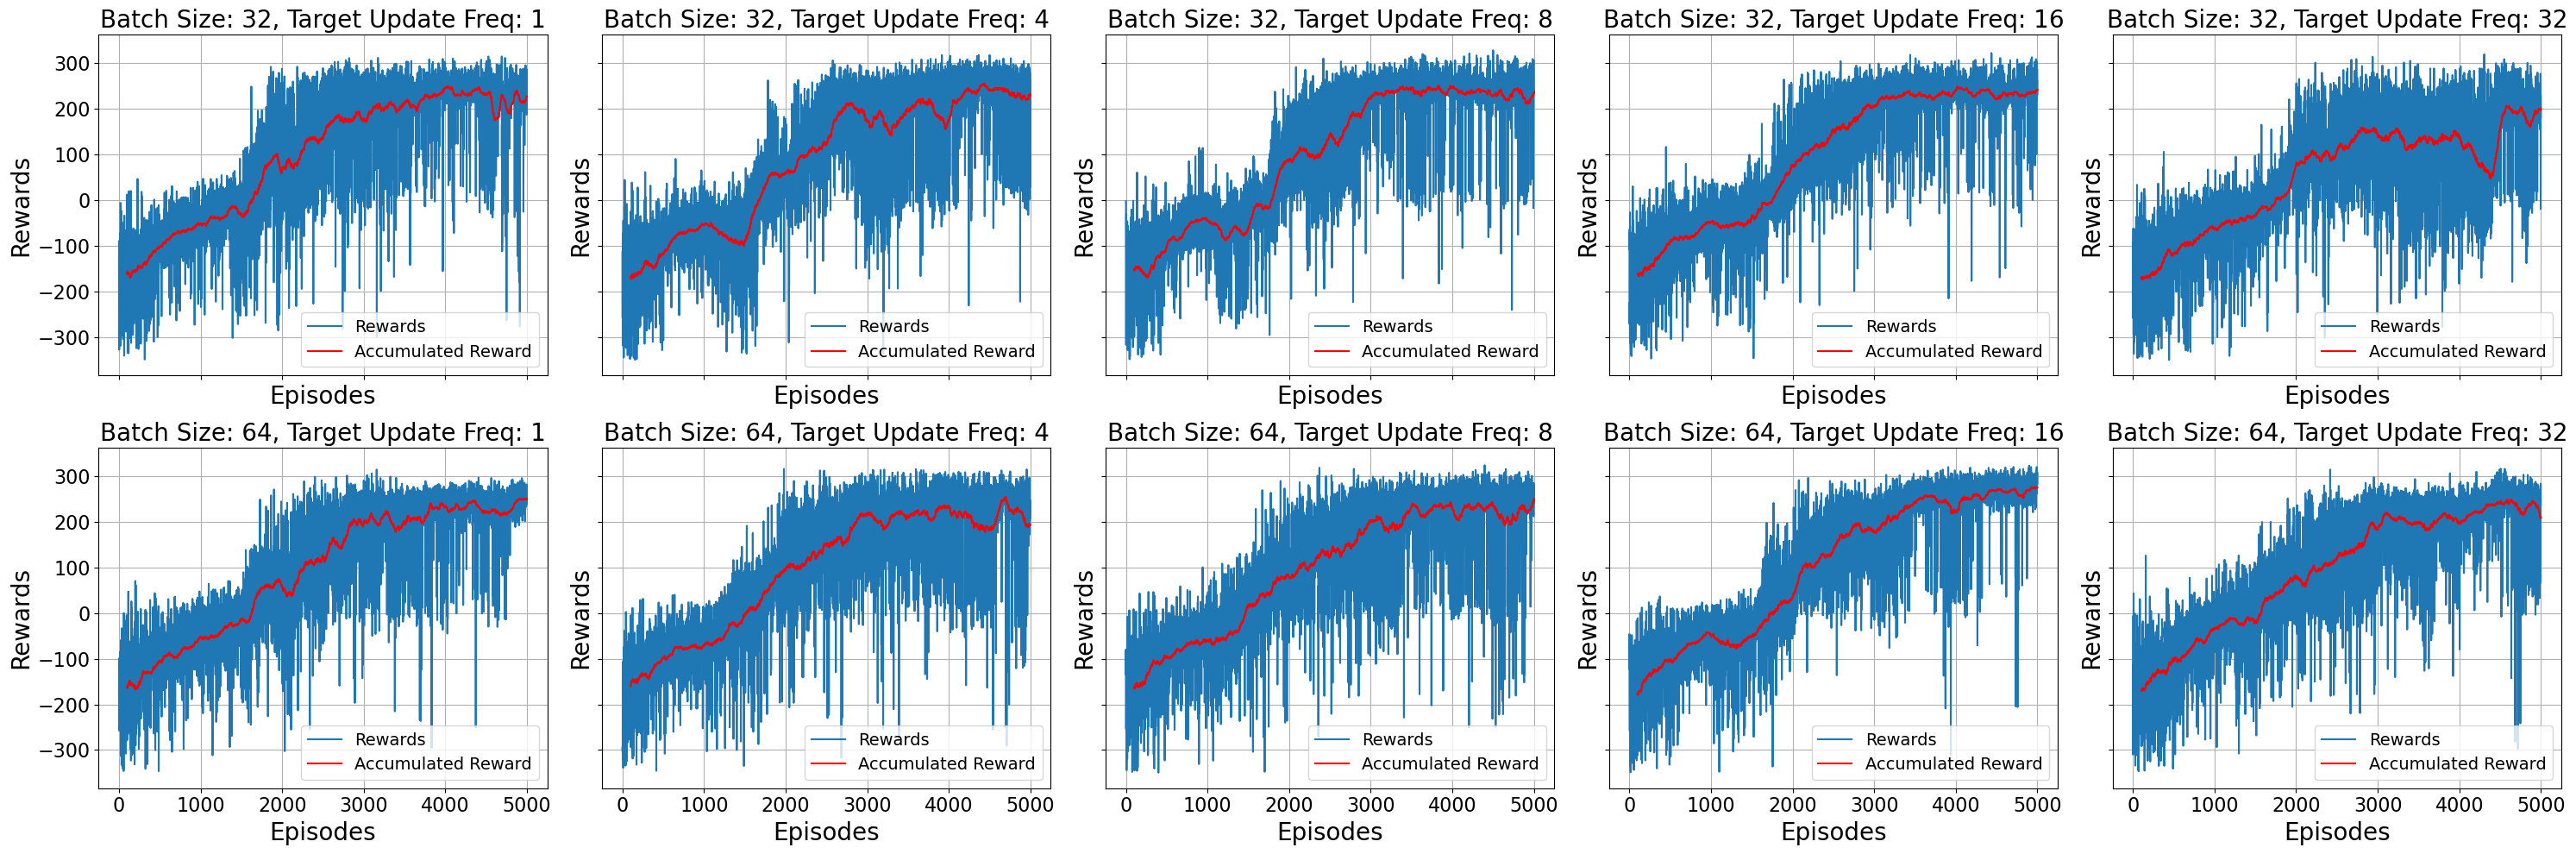

In [56]:
BATCH_SIZE = [32, 64]
TARGET_UPDATE_FREQ = [1, 4, 8, 16, 32]
PREPATH = "lunarlander/models"

fig, axs = plt.subplots( len(BATCH_SIZE),len(TARGET_UPDATE_FREQ), figsize=(30, 10), sharex=True, sharey=True)

for i, batch_size in enumerate(BATCH_SIZE):
    for j, target_update_freq in enumerate(TARGET_UPDATE_FREQ):
        ax = axs[i, j]
        PATH = f"{PREPATH}/batch_size_{batch_size}/target_update_freq_{target_update_freq}"
        rewards = np.load(f"{PATH}/train_rewards.npy")
        plot_training_results(ax, rewards, accum_avg=True)
        ax.set_title(f'Batch Size: {batch_size}, Target Update Freq: {target_update_freq}', fontsize = 20)


plt.tight_layout()
plt.show()

# TESTING PLOTS

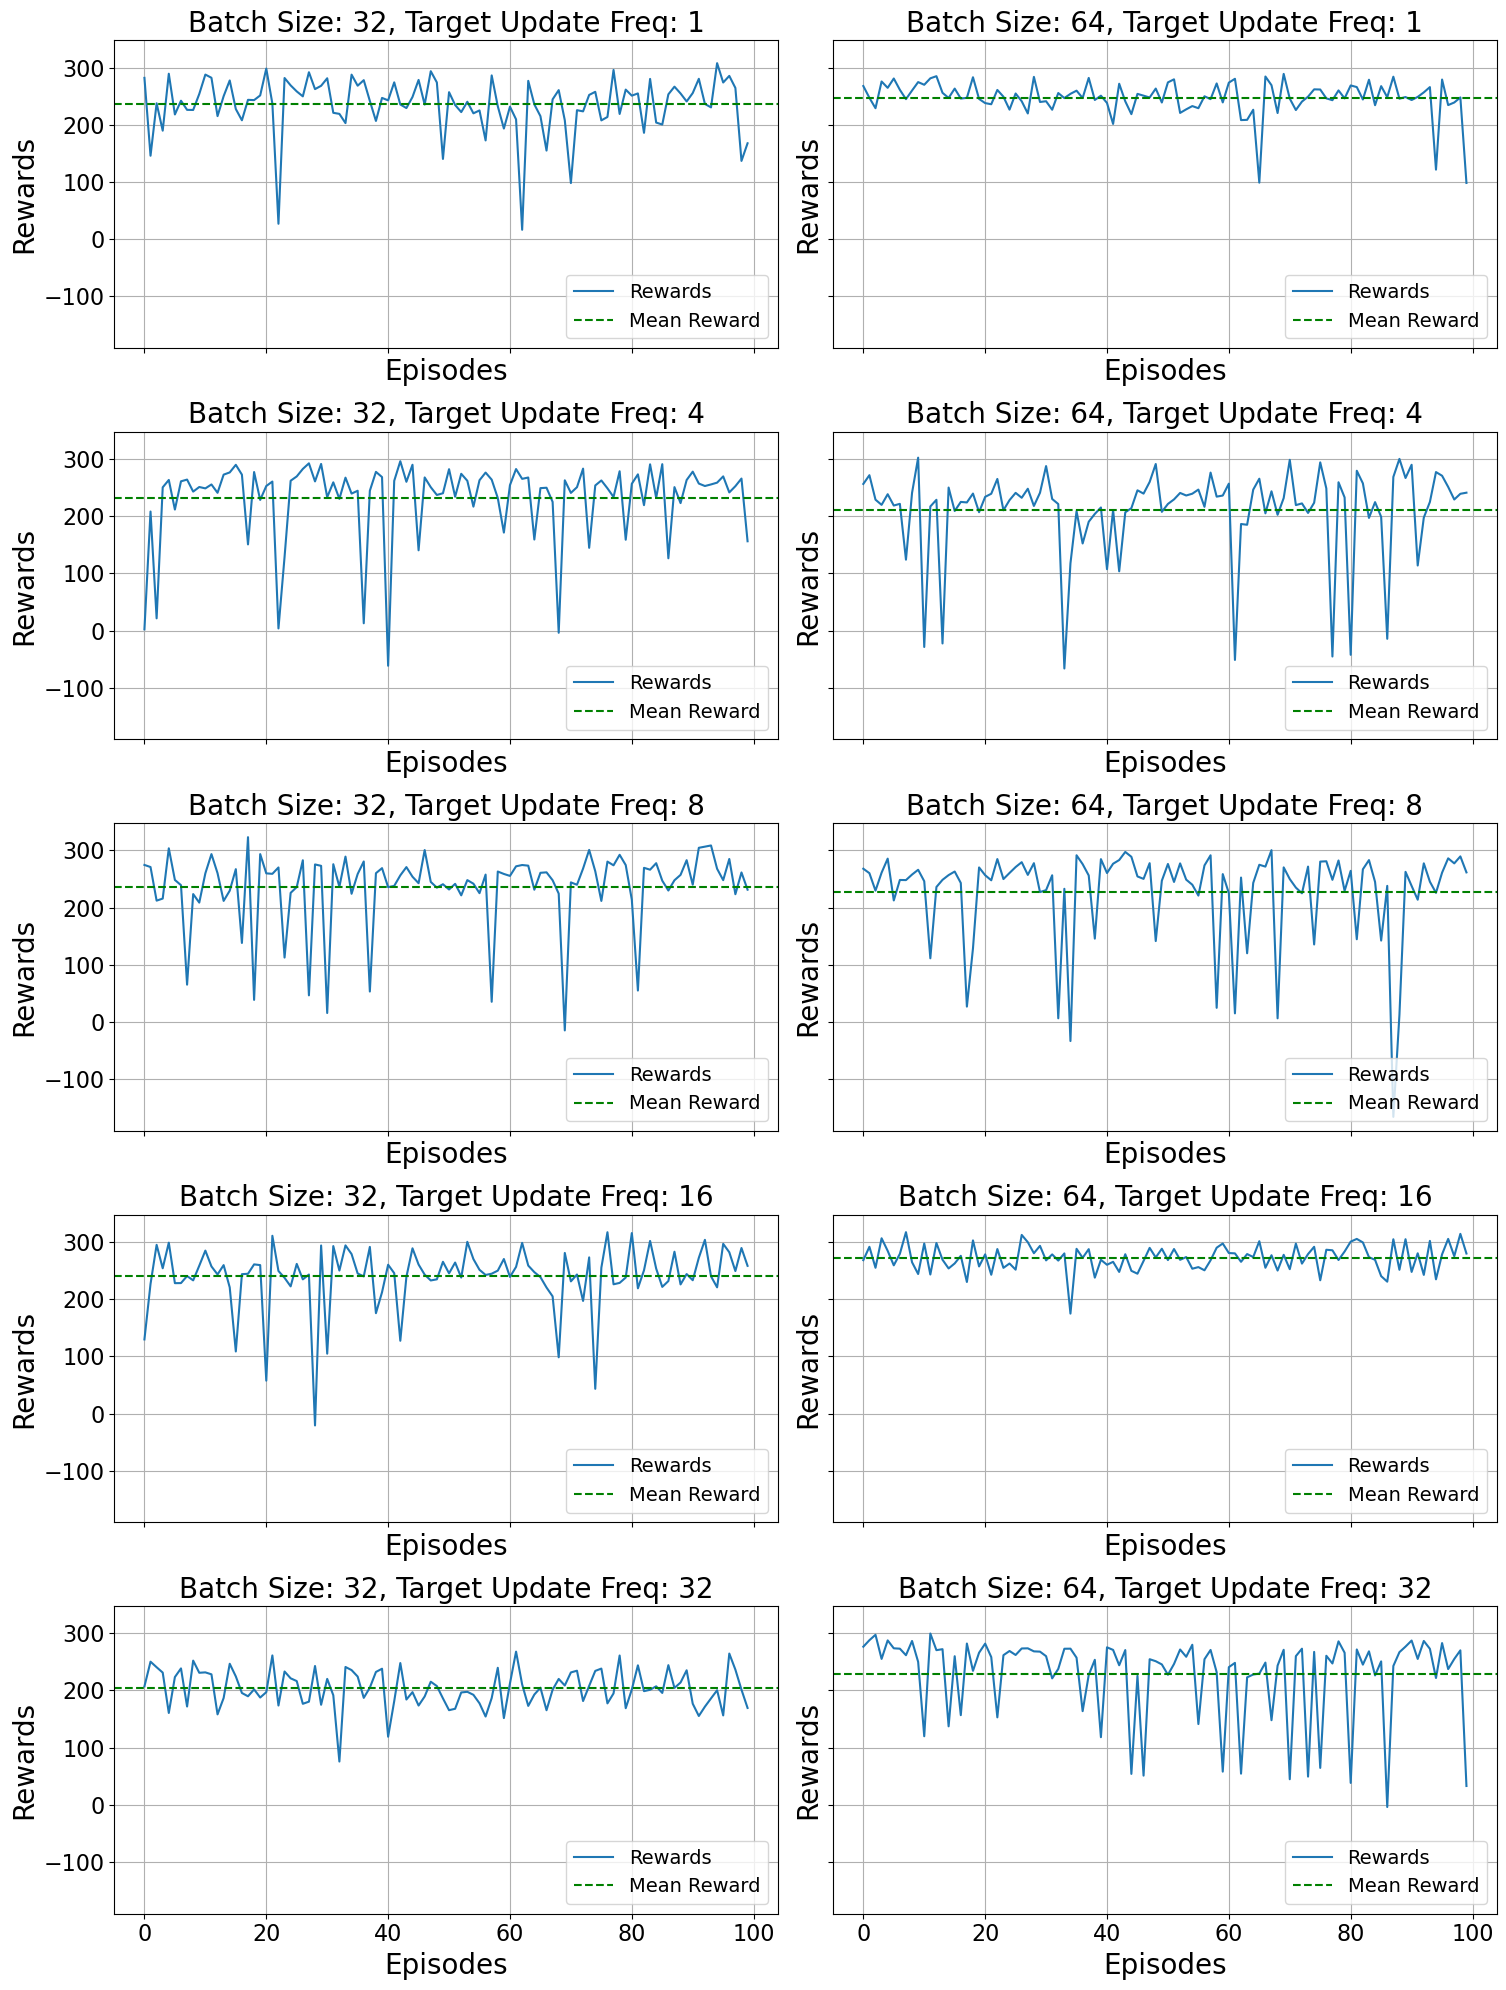

In [57]:
BATCH_SIZE = [32, 64]
TARGET_UPDATE_FREQ = [1, 4, 8, 16, 32]
PREPATH = "lunarlander/models"

fig, axs = plt.subplots(len(TARGET_UPDATE_FREQ), len(BATCH_SIZE), figsize=(15, 20), sharex=True, sharey=True)

for i, target_update_freq in enumerate(TARGET_UPDATE_FREQ):
    for j, batch_size in enumerate(BATCH_SIZE):
        ax = axs[i, j]
        PATH = f"{PREPATH}/batch_size_{batch_size}/target_update_freq_{target_update_freq}"
        rewards = np.load(f"{PATH}/test_rewards.npy")
        plot_training_results(ax, rewards, accum_avg=False, mean=True)
        ax.set_title(f'Batch Size: {batch_size}, Target Update Freq: {target_update_freq}',  fontsize = 20)

plt.tight_layout()
plt.show()

# AVERAGE REWARD CARTPOLE
Average rewards for models with batch sizes [32, 64] and target update frequency [1, 2, 4, 6, 8] in training intervals of 100 episodes and testing of 20 episodes per model.

In [58]:
BATCH_SIZE = [32, 64]
TARGET_UPDATE_FREQ = [1, 2, 4, 6, 8]
PREPATH = "cartpole/models"

for batch_size in BATCH_SIZE:
    for target_update_freq in TARGET_UPDATE_FREQ:
        PATH = f"{PREPATH}/batch_size_{batch_size}/target_update_freq_{target_update_freq}"
        for episode in range(100, 500, 100):
            rewards = np.load(f"{PATH}/intermediate_results/test_rewards_episode_{episode}.npy")
            print(f"Batch Size: {batch_size} | Target Update Freq: {target_update_freq} | Episode: {episode} | Avg. Rewards {np.mean(rewards)}")
        
        final_rewards = np.load(f"{PATH}/test_rewards.npy")
        print(f"Batch Size: {batch_size} | Target Update Freq: {target_update_freq} | Final Avg. Rewards {np.mean(final_rewards)}")

Batch Size: 32 | Target Update Freq: 1 | Episode: 100 | Avg. Rewards 172.75
Batch Size: 32 | Target Update Freq: 1 | Episode: 200 | Avg. Rewards 200.0
Batch Size: 32 | Target Update Freq: 1 | Episode: 300 | Avg. Rewards 196.11
Batch Size: 32 | Target Update Freq: 1 | Episode: 400 | Avg. Rewards 200.0
Batch Size: 32 | Target Update Freq: 1 | Final Avg. Rewards 200.0
Batch Size: 32 | Target Update Freq: 2 | Episode: 100 | Avg. Rewards 164.41
Batch Size: 32 | Target Update Freq: 2 | Episode: 200 | Avg. Rewards 173.85
Batch Size: 32 | Target Update Freq: 2 | Episode: 300 | Avg. Rewards 171.47
Batch Size: 32 | Target Update Freq: 2 | Episode: 400 | Avg. Rewards 168.6
Batch Size: 32 | Target Update Freq: 2 | Final Avg. Rewards 176.2
Batch Size: 32 | Target Update Freq: 4 | Episode: 100 | Avg. Rewards 189.25
Batch Size: 32 | Target Update Freq: 4 | Episode: 200 | Avg. Rewards 189.52
Batch Size: 32 | Target Update Freq: 4 | Episode: 300 | Avg. Rewards 147.17
Batch Size: 32 | Target Update Freq

# AVERAGE REWARD LUNARLANDER
Average rewards for models with batch sizes [32, 64] and target update frequency [1, 4, 8, 16, 32] in training intervals of 500 episodes and testing of 100 episodes per model.

In [59]:
BATCH_SIZE = [32, 64]
TARGET_UPDATE_FREQ = [1, 4, 8, 16, 32]
PREPATH = "lunarlander/models"

for batch_size in BATCH_SIZE:
    for target_update_freq in TARGET_UPDATE_FREQ:
        PATH = f"{PREPATH}/batch_size_{batch_size}/target_update_freq_{target_update_freq}"
        for episode in range(500, 5000, 500):
            rewards = np.load(f"{PATH}/intermediate_results/test_rewards_episode_{episode}.npy")
            print(f"Batch Size: {batch_size} | Target Update Freq: {target_update_freq} | Episode: {episode} | Avg. Rewards {np.mean(rewards)}")
        
        final_rewards = np.load(f"{PATH}/test_rewards.npy")
        print(f"Batch Size: {batch_size} | Target Update Freq: {target_update_freq} | Final Avg. Rewards {np.mean(final_rewards)}")

Batch Size: 32 | Target Update Freq: 1 | Episode: 500 | Avg. Rewards -53.37315119620939
Batch Size: 32 | Target Update Freq: 1 | Episode: 1000 | Avg. Rewards -111.68130045469832
Batch Size: 32 | Target Update Freq: 1 | Episode: 1500 | Avg. Rewards 2.6991051176459724
Batch Size: 32 | Target Update Freq: 1 | Episode: 2000 | Avg. Rewards 240.4566551877334
Batch Size: 32 | Target Update Freq: 1 | Episode: 2500 | Avg. Rewards 244.3958058118903
Batch Size: 32 | Target Update Freq: 1 | Episode: 3000 | Avg. Rewards 173.45218381813098
Batch Size: 32 | Target Update Freq: 1 | Episode: 3500 | Avg. Rewards 212.0654850267217
Batch Size: 32 | Target Update Freq: 1 | Episode: 4000 | Avg. Rewards 250.67716558903902
Batch Size: 32 | Target Update Freq: 1 | Episode: 4500 | Avg. Rewards 239.76142307016667
Batch Size: 32 | Target Update Freq: 1 | Final Avg. Rewards 235.6239970202571
Batch Size: 32 | Target Update Freq: 4 | Episode: 500 | Avg. Rewards -576.3695712586866
Batch Size: 32 | Target Update Freq: